## Reading in packages, data

In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, \
                            classification_report, precision_recall_curve, log_loss, accuracy_score

In [8]:
spotify_df = pd.read_csv('6classspotifytracks.csv')

In [16]:
spotify_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [17]:
spotify_df

,track_name,album,artist,release_date,length,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,One More Year,The Slow Rush,Tame Impala,2020-02-14,324013,59,0.602,0.8800,1,-5.414,1,0.0354,0.0570,0.46000,0.2840,0.493,114.009,4,Rock
1,Vámonos de Viaje,BACH,Bandalos Chinos,2018-08-03,235866,2,0.766,0.7490,5,-6.147,1,0.0303,0.0249,0.00215,0.3550,0.889,129.010,4,Rock
2,Sofia,Immunity,Clairo,2019-08-02,188386,83,0.744,0.6190,0,-9.805,1,0.0390,0.5980,0.00372,0.2310,0.641,112.997,4,Rock
3,Sadnecessary,Sadnecessary,Milky Chance,2013-05-31,298000,51,0.757,0.5420,9,-10.674,1,0.0775,0.7960,0.01960,0.2650,0.466,107.988,4,Rock
4,Closedloop,Boomerang EP,Elliot Moss,2017-04-28,280689,37,0.803,0.4200,7,-10.220,0,0.0432,0.2560,0.11200,0.0703,0.493,130.031,4,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27250,"Suite in G Minor, BWV 995: II. Allemande",Bach: Lute Music,Johann Sebastian Bach,2011-04-01,356379,0,0.444,0.0801,6,-25.604,0,0.0414,0.9900,0.88000,0.0863,0.185,113.049,4,classical
27251,"Suite in G Minor, BWV 995: III. Courante",Bach: Lute Music,Johann Sebastian Bach,2011-04-01,146935,0,0.405,0.1940,6,-23.411,0,0.0377,0.9890,0.86500,0.1220,0.497,70.446,3,classical
27252,"Suite in G Minor, BWV 995: IV. Sarabande",Bach: Lute Music,Johann Sebastian Bach,2011-04-01,161146,0,0.581,0.0396,1,-28.248,0,0.0511,0.9870,0.86800,0.1060,0.270,97.527,4,classical
27253,"Suite in G Minor, BWV 995: V. Gavottes 1 & 2",Bach: Lute Music,Johann Sebastian Bach,2011-04-01,256441,0,0.338,0.2070,9,-23.228,1,0.0318,0.9930,0.86800,0.1030,0.521,142.867,4,classical


## Plotting features vs target

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will

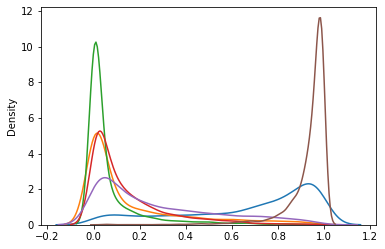

In [184]:
jazz = spotify_df.loc[spotify_df['genre'] == 'Jazz']
rock = spotify_df.loc[spotify_df['genre'] == 'Rock']
electronic = spotify_df.loc[spotify_df['genre'] == 'electronic']
hiphop = spotify_df.loc[spotify_df['genre'] == 'hiphop']
country = spotify_df.loc[spotify_df['genre'] == 'country']
classical = spotify_df.loc[spotify_df['genre'] == 'classical']

sns.distplot(jazz[['acousticness']], hist=False)
sns.distplot(rock[['acousticness']], hist=False)
sns.distplot(electronic[['acousticness']], hist=False)
sns.distplot(hiphop[['acousticness']], hist=False)
sns.distplot(country[['acousticness']], hist=False)
sns.distplot(classical[['acousticness']], hist=False)

plt.savefig('acousticness.png', dpi=150, bbox_inches="tight");

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will

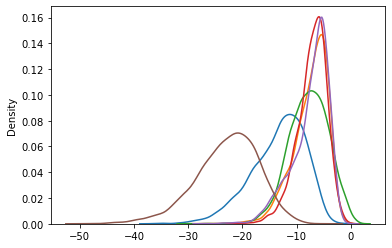

In [185]:
jazz = spotify_df.loc[spotify_df['genre'] == 'Jazz']
rock = spotify_df.loc[spotify_df['genre'] == 'Rock']
electronic = spotify_df.loc[spotify_df['genre'] == 'electronic']
hiphop = spotify_df.loc[spotify_df['genre'] == 'hiphop']
country = spotify_df.loc[spotify_df['genre'] == 'country']
classical = spotify_df.loc[spotify_df['genre'] == 'classical']

sns.distplot(jazz[['loudness']], hist=False)
sns.distplot(rock[['loudness']], hist=False)
sns.distplot(electronic[['loudness']], hist=False)
sns.distplot(hiphop[['loudness']], hist=False)
sns.distplot(country[['loudness']], hist=False)
sns.distplot(classical[['loudness']], hist=False)

plt.savefig('loudness.png', dpi=150, bbox_inches="tight");

## Splitting data

In [169]:
X = np.array(spotify_df.iloc[:, 4:-1])
y = np.array(spotify_df.genre)

In [170]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Trying KNN

In [133]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=39, weights='distance')
knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_val_pred = knn.predict(X_val_scaled)

In [134]:
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
val_accuracy = metrics.accuracy_score(y_val, y_val_pred)

print("Train Accuracy:" , round(train_accuracy, 3))
print("Val Accuracy:" , round(val_accuracy, 3))

Train Accuracy: 0.999
Val Accuracy: 0.741


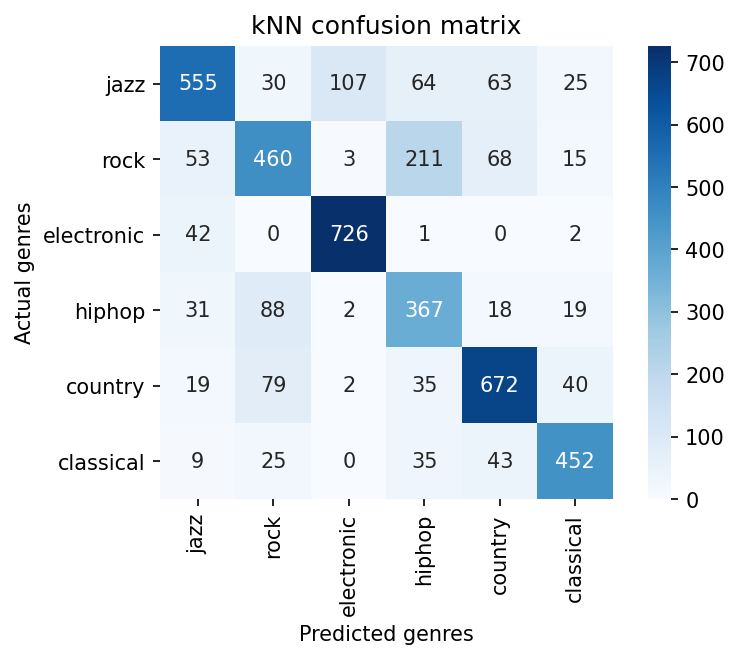

In [181]:
knn_confusion = confusion_matrix(y_val, knn.predict(X_val_scaled))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['jazz', 'rock', 'electronic', 'hiphop', 'country', 'classical'],
           yticklabels=['jazz', 'rock', 'electronic', 'hiphop', 'country', 'classical']);

plt.xlabel('Predicted genres')
plt.ylabel('Actual genres')
plt.title('kNN confusion matrix')
plt.savefig('KBBMatrix.png', dpi=150, bbox_inches="tight");

## Trying XGBoost

In [172]:
y_train_xgb = pd.DataFrame(data= y_train)
y_val_xgb = pd.DataFrame(data= y_val)
y_test_xgb = pd.DataFrame(data= y_test)

In [173]:
le = preprocessing.LabelEncoder()
le.fit(y_train_xgb)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LabelEncoder()

In [174]:
y_train_xgb = le.transform(y_train_xgb)
y_val_xgb = le.transform(y_val_xgb)
y_test_xgb = le.transform(y_test_xgb)

In [ ]:
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, 
                       max_depth=5,
                       objective="multi:softmax",  
                       learning_rate=0.3, 
                       eval_metric='merror',                   
                       subsample=0.8,
                       min_child_weight=12,
                       colsample_bytree=0.7,
                       n_jobs=-1,
                       num_class=10, 
                       )

eval_set=[(X_train,y_train_xgb),(X_val,y_val_xgb)] 

fit_model = gbm.fit( 
                    X_train, y_train_xgb, 
                    eval_set=eval_set,
                    eval_metric='merror',
                    early_stopping_rounds=30,
                    verbose=True 
                    )

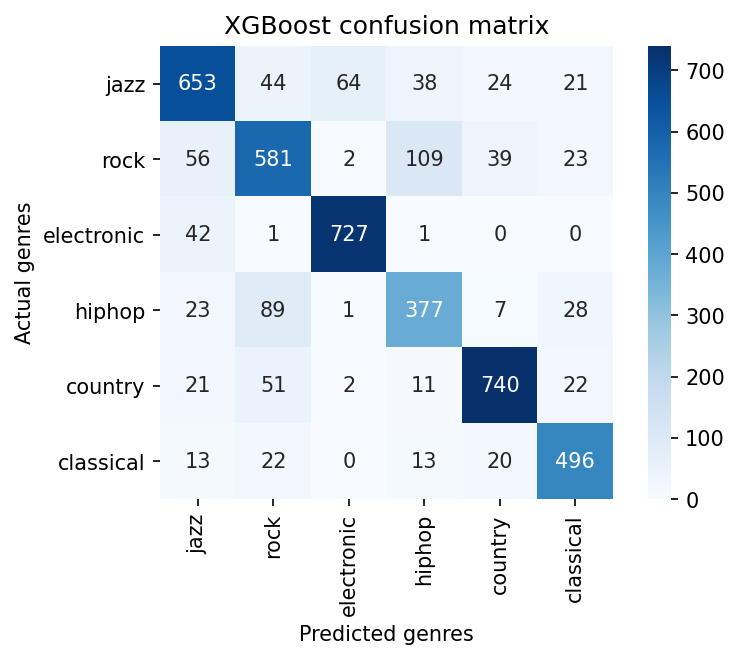

In [214]:
xgb_confusion = confusion_matrix(y_val_xgb, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit))
plt.figure(dpi=150)
sns.heatmap(xgb_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['jazz', 'rock', 'electronic', 'hiphop', 'country', 'classical'],
           yticklabels=['jazz', 'rock', 'electronic', 'hiphop', 'country', 'classical']);

plt.xlabel('Predicted genres')
plt.ylabel('Actual genres')
plt.title('XGBoost confusion matrix')
plt.savefig('XGBoostMatrix.png', dpi=150, bbox_inches="tight");

In [213]:
y_train_preds = gbm.predict(X_train)
y_val_preds = gbm.predict(X_val)

train_accuracy = metrics.accuracy_score(y_train_xgb, y_train_preds)
val_accuracy = metrics.accuracy_score(y_val_xgb, y_val_preds)

print("Train Accuracy:" , round(train_accuracy, 3))
print("Val Accuracy:" , round(val_accuracy, 3))

Train Accuracy: 0.955
Val Accuracy: 0.82


In [215]:
print(classification_report(y_val_xgb, gbm.predict(X_val, ntree_limit=gbm.best_ntree_limit)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       844
           1       0.74      0.72      0.73       810
           2       0.91      0.94      0.93       771
           3       0.69      0.72      0.70       525
           4       0.89      0.87      0.88       847
           5       0.84      0.88      0.86       564

    accuracy                           0.82      4361
   macro avg       0.81      0.82      0.81      4361
weighted avg       0.82      0.82      0.82      4361



## Picking XGBoost as final model, test scores

In [216]:
y_xgb = pd.DataFrame(data=y)

In [217]:
le = preprocessing.LabelEncoder()
le.fit(y_xgb)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


LabelEncoder()

In [218]:
y_xgb = le.transform(y_xgb)

In [ ]:
gbm = xgb.XGBRegressor( 
                       n_estimators=30000, 
                       max_depth=5,
                       objective="multi:softmax",  
                       learning_rate=0.1, 
                       eval_metric='merror',                   
                       subsample=0.8,
                       min_child_weight=12,
                       colsample_bytree=0.7,
                       n_jobs=-1,
                       num_class=6, 
                       )

eval_set=[(X_train,y_train_xgb),(X_val,y_val_xgb)] 

fit_model = gbm.fit(X, y_xgb,
                    eval_set=eval_set,
                    eval_metric='merror',
                    early_stopping_rounds=20,
                    verbose=True 
                    )

In [228]:
y_test_preds = gbm.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test_xgb, y_test_preds)

print("Test Accuracy:" , round(test_accuracy, 3))

Test Accuracy: 0.816


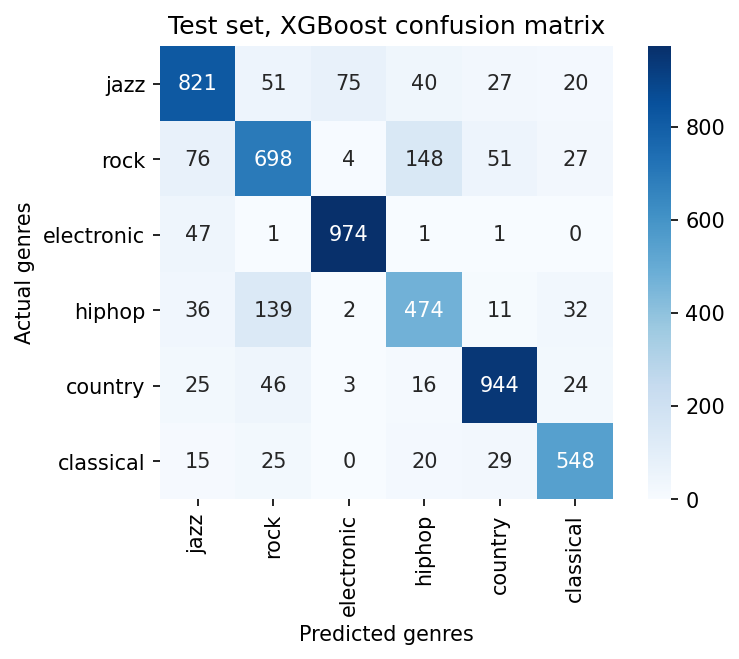

In [221]:
xgb_confusion = confusion_matrix(y_test_xgb, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit))
plt.figure(dpi=150)
sns.heatmap(xgb_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['jazz', 'rock', 'electronic', 'hiphop', 'country', 'classical'],
           yticklabels=['jazz', 'rock', 'electronic', 'hiphop', 'country', 'classical']);

plt.xlabel('Predicted genres')
plt.ylabel('Actual genres')
plt.title('Test set, XGBoost confusion matrix')
plt.savefig('TestSetXGBoostMatrix.png', dpi=150, bbox_inches="tight");

## Feature Importance

In [142]:
pd.DataFrame({'col_name': gbm.feature_importances_}, index = ['length', 'popularity', 
          'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 
          'instrumentalness', 'liveness', 'valence', 'tempo','time_signature']) \
            .sort_values(by='col_name', ascending=False)

,col_name
acousticness,0.139235
speechiness,0.122210
loudness,0.120953
instrumentalness,0.120614
danceability,0.099007
energy,0.078974
mode,0.077415
tempo,0.054851
length,0.047154
popularity,0.040731


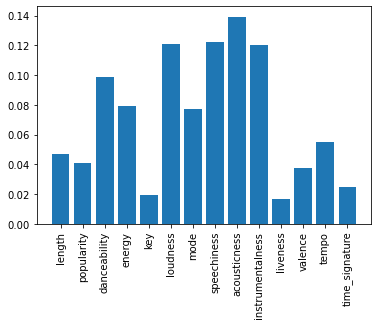

In [143]:
plt.bar(range(len(gbm.feature_importances_)), gbm.feature_importances_)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13], ['length', 'popularity', 
          'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 
          'instrumentalness', 'liveness', 'valence', 'tempo','time_signature'], rotation = 90);

In [ ]:
eval_set=[(X_train_df,y_train_xgb),(X_val_df,y_val_xgb)] 


model = xgb.XGBRegressor(n_estimators=30000, 
                       max_depth=5,
                       objective="multi:softmax",  
                       learning_rate=0.1, 
                       eval_metric='merror',                   
                       subsample=0.8,
                       min_child_weight=12,
                       colsample_bytree=0.7,
                       n_jobs=-1,
                       num_class=10, 
                       ).fit(X, y_xgb, 
                       eval_set=eval_set,
                       eval_metric='merror', 
                       early_stopping_rounds=20)

In [32]:
import shap

In [33]:
shap.initjs()

In [75]:
mybooster = model.get_booster()

model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun

shap_ex = shap.TreeExplainer(mybooster)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [154]:
shap_values = shap_ex.shap_values(X_test_df)

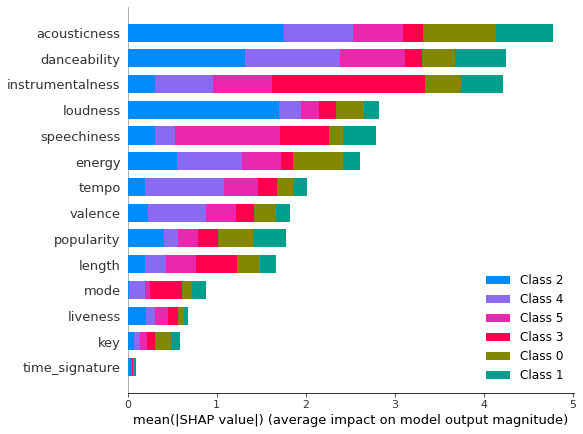

<Figure size 432x288 with 0 Axes>

In [186]:
shap.summary_plot(shap_values[0:6], X_test_df, plot_type="bar")
plt.savefig('featuresshap.png', dpi=150, bbox_inches="tight");

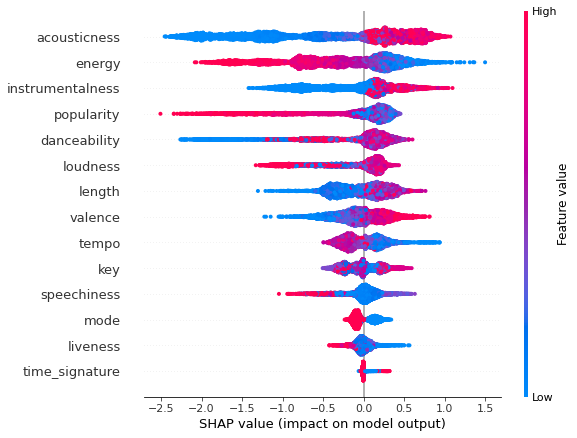

In [156]:
shap.summary_plot(shap_values[0], X_test_df)
#high positive acousticness, more prediction for jazz
#low negative acousticness, less prediction for jazz

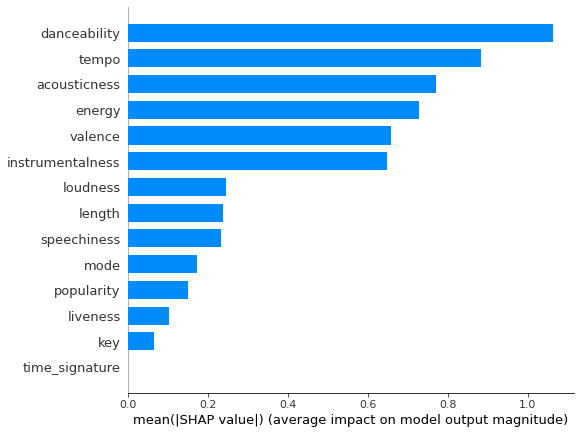

In [205]:
shap.summary_plot(shap_values[4], X_test_df, plot_type='bar')
#plt.savefig('jazzfeatures.png', dpi=150, bbox_inches="tight");
#jazz

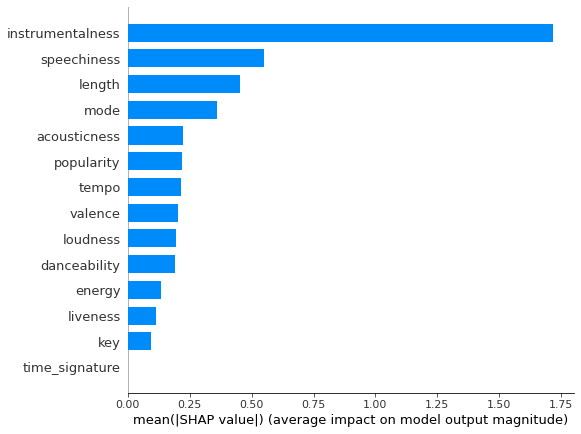

<Figure size 432x288 with 0 Axes>

In [188]:
shap.summary_plot(shap_values[3], X_test_df, plot_type='bar')
plt.savefig('hiphopfeatures.png', dpi=150, bbox_inches="tight");
#hiphop

## Looking at Predicted vs Actual track genres

In [148]:
X_test_df = pd.DataFrame(data=X_test,
          columns=['length', 'popularity', 
          'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 
          'instrumentalness', 'liveness', 'valence', 'tempo','time_signature'])

In [245]:
y_test_df = pd.DataFrame(data=y_test_preds)
y_actual_df = pd.DataFrame(data=y_test_xgb)

In [ ]:
y_actual_df.rename(columns={0:'actual_genre'}, inplace=True)
y_test_df.rename(columns={0:'predicted_genre'}, inplace=True)

In [263]:
#X_test_df = X_test_df.join(y_test_df, how='outer')
X_test_df = X_test_df.join(y_actual_df, how='outer')

In [280]:
merged_df = spotify_df.merge(X_test_df, how = 'outer', on = ['length', 'popularity'])
merged_df.dropna(inplace=True)

In [286]:
merged_df.to_csv('predictedactual.csv')